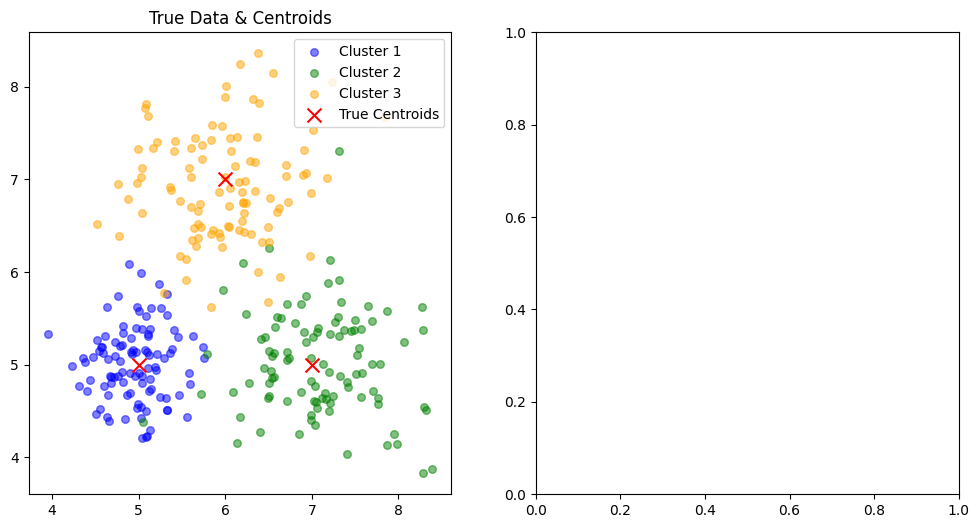

MovieWriter imagemagick unavailable; using Pillow instead.


In [1]:
# ============================================================================
# Author: pf.zh
# Date: 2024-12-02
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 生成数据点，三个簇，确保簇之间不要离得太远
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[5, 5], scale=0.4, size=(100, 2)),  # 第一个簇，中心在 (5, 5)
    np.random.normal(loc=[7, 5], scale=0.6, size=(100, 2)),  # 第二个簇，中心在 (7, 5)
    np.random.normal(loc=[6, 7], scale=0.6, size=(100, 2))   # 第三个簇，中心在 (6, 7)
])

# 真实的簇中心
true_centroids = np.array([[5, 5], [7, 5], [6, 7]])

# K-medoids 聚类函数
def kmedoids_iterate(X, k=3, max_iter=100):
    # 使用随机数生成簇中心，确保初始化的簇中心不会离得太远
    initial_medoids = np.random.choice(X.shape[0], k, replace=False)
    medoids = X[initial_medoids]  # 初始化簇中心
    labels = np.zeros(X.shape[0])

    def update(frame):
        nonlocal medoids, labels

        # 计算每个点到各簇中心的距离，并分配簇标签
        distances = np.linalg.norm(X[:, np.newaxis] - medoids, axis=2)
        labels = np.argmin(distances, axis=1)

        # 更新每个簇的 medoid：选择簇内点与 medoid 之间距离的总和最小的点
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            distances_to_points = np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2)
            cluster_cost = np.sum(distances_to_points, axis=1)
            new_medoids[i] = cluster_points[np.argmin(cluster_cost)]  # 选择成本最小的点作为新中心

        # 更新簇中心
        medoids = new_medoids

        # 清空右侧图像并重新绘制
        ax[1].clear()

        # 绘制右侧的聚类过程
        # 绘制右侧的聚类过程
        colors = ['blue', 'green', 'orange']
        # 为每个簇分配一个颜色
        for i in range(k):
            ax[1].scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], s=30, alpha=0.5, label=f"Cluster {i+1}")
        ax[1].scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100, label="Medoids")
        ax[1].set_title(f"K-medoids Iteration {frame + 1}")
        ax[1].legend(loc='best')

    return update

# 创建绘图和动画
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 创建1行2列的子图

# 左侧图：显示真实数据和簇中心
# 使用不同的颜色标记真实数据簇
ax[0].scatter(X[:100, 0], X[:100, 1], c='blue', s=30, alpha=0.5, label="Cluster 1")
ax[0].scatter(X[100:200, 0], X[100:200, 1], c='green', s=30, alpha=0.5, label="Cluster 2")
ax[0].scatter(X[200:, 0], X[200:, 1], c='orange', s=30, alpha=0.5, label="Cluster 3")

# 真实的簇中心（用红色的 `x` 标记）
ax[0].scatter(true_centroids[:, 0], true_centroids[:, 1], c='red', marker='x', s=100, label="True Centroids")
ax[0].set_title("True Data & Centroids")
ax[0].legend(loc='best')

# K-medoids 迭代动画，frames设置为10帧
update_function = kmedoids_iterate(X)
ani = FuncAnimation(fig, update_function, frames=range(3), repeat=False)

# 显示图形
plt.show()

# 保存动图
ani.save('output/kmedoids-fig1.gif', writer='imagemagick', fps=1)